# EL JUEGO DE LA VIDA

## INTRODUCCION

El juego de la vida se desarrolla sobre un tablero cuadriculado o rejilla que en principio se presupone que es infinito. Evidentemente, en la práctica eso no puede ser, pero basta con hacerlo suficientemente grande. Cada casilla de ese tablero puede estar libre u ocupada. Estos dos estados se suelen distinguir con distintos colores. Cada casilla de este tablero está pues rodeada a su vez por otras 8 casillas o celdas. 

## REGLAS

El estado que tendrá una casilla en el siguiente turno se calcula siguiendo 3 reglas muy simples (como casi todos los juegos de Conway) pero que, sorprendentemente, pueden dar lugar a situaciones de enorme complejidad:

1. Cualquier celda viva con menos de dos vecinos vivos muere, como si estuviera causada por la población insuficiente.    
2. Cualquier célula viva con dos o tres vecinos vivos vive para la próxima generación.
3. Cualquier celda viva con más de tres vecinos vivos muere, como por sobrepoblación.
4. Cualquier celda muerta con exactamente tres vecinos vivos se convierte en una célula viva, como por reproducción..

## EJEMPLO DE REGLAS

![N|Solid](https://cdn.tutsplus.com/gamedev/authors/legacy/Stephane%20Beniak/2012/09/11/RulesDiagram.png)

## IMPLEMENTACION EN PYTHON

In [64]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.patches as patches

In [65]:
def exten(mat): 
    n = len(mat) 
    ex = np.zeros((n+2,n+2)) 
    ex[1:n+1,1:n+1] = mat 
    return ex

In [66]:
def veci(i,j, ex): 
    return (ex[i,j-1] + ex[i,j+1] + ex[i-1,j-1] + (ex[i-1,j] + ex[i-1,j+1] + ex[i+1,j-1]) + (ex[i+1,j]+ ex[i+1,j+1]))

In [67]:
def reglas(mat): 
    n = len(mat) 
    ex = exten(mat) 
    nmat = np.zeros((n,n)) 
    for i in range(1,n+1): 
        for j in range(1,n+1): 
            s = veci(i,j,ex) 
            if s>3 or s <=1: 
                nmat[i-1,j-1] = 0 
            if s == 3 and mat[i-1,j-1]== 0: 
                nmat[i-1,j-1] = 1 
            if (s == 3 or s== 2) and mat[i-1,j-1]== 1: 
                nmat[i-1,j-1] = 1 
    return nmat

In [68]:
def correr(n,ini): 
    pasos = [] 
    pasos.append(ini) 
    g = ini 
    for i in range(n): 
        g = reglas(g) 
        pasos.append(g) 
    return pasos

In [69]:
init = np.zeros((34,34)) 
init[8,5] = 1 
init[8,6] = 1 
init[8,7] = 1 
init[8,8] = 1 
init[8,9] = 1 
init[8,11] = 1 
init[8,12] = 1 
init[8,13] = 1 
init[8,14] = 1 
init[8,15] = 1
init[8,16] = 1 
init[8,17] = 1 
init[8,18] = 1

In [91]:
res = correr(5, init)

In [92]:
def grafmat(mt): 
    n = len(mt) 
    dx = 1/n 
    pieces = [] 
    frame = patches.Rectangle( 
        (0.0, 0.0),1, 1, fill=False, edgecolor="white",linewidth=2) 
    pieces.append(frame) 
    for j in range(n): 
        for i in range(n): 
            if mt[i,j]== 1: 
                p = patches.Rectangle( 
                    (j/n,(n-1-i)/n), dx,dx, edgecolor="Gray", facecolor="black", fill=True, linewidth=2 )
                pieces.append(p) 
            if mt[i,j]== 0:
                p = patches.Rectangle( 
                    (j/n,(n-1-i)/n), dx,dx, edgecolor="Gray", fill=False,linewidth=2) 
                pieces.append(p) 
    return pieces

In [93]:
 def vermat(x): 
        ax1=plt.subplot(111,aspect='equal') 
        shape = grafmat(x) 
        for p in shape: ax1.add_patch(p) 
        plt.axis('off') 
        plt.show()

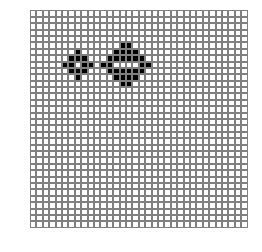

In [94]:
vermat (res[3])

In [109]:
def ver5(v,w,x,y,z): 
    fg = plt.figure(figsize=(20,4)) 
    adj = plt.subplots_adjust(hspace=0.4)
    
    ax0=plt.subplot(151,aspect='equal') 
    shape = grafmat(v) 
    for p in shape: ax0.add_patch(p) 
    plt.axis('off')
    
    ax1=plt.subplot(152,aspect='equal') 
    shape = grafmat(w) 
    for p in shape: ax1.add_patch(p) 
    plt.axis('off')
    
    ax2=plt.subplot(153,aspect='equal')  
    shape = grafmat(x) 
    for p in shape: ax2.add_patch(p) 
    plt.axis('off')
    
    ax3=plt.subplot(154,aspect='equal') 
    shape = grafmat(y) 
    for p in shape: ax3.add_patch(p) 
    plt.axis('off')
    
    ax4=plt.subplot(155,aspect='equal') 
    shape = grafmat(z) 
    for p in shape: ax4.add_patch(p) 
    plt.axis('off')
    plt.show()

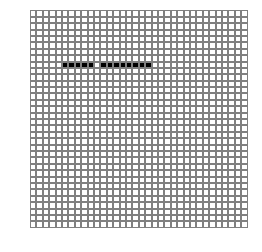

In [117]:
cor= correr(35, init)
vermat(init)

In [118]:
def base(): 
        Base = np.zeros((34,34)) 
        Base[2,2] = 1 
        Base[2,4] = 1 
        Base[2,6] = 1 
        Base[4,2] = 1 
        Base[4,4] = 1 
        Base[4,6] = 1 
        Base[6,2] = 1 
        Base[6,4] = 1 
        Base[6,6] = 1  
        return Base

In [119]:
m1 = base() 
m1[2,2] = 1 
m1[2,3] = 1 
m1[2,4] = 1 
m1[3,2] = 1 
m1[4,2] = 1 
m1[5,2] = 1 
m1[6,2] = 1 
m1[6,3] = 1 
m1[6,4] = 1

m2 = base() 
m2[2,2] = 1 
m2[2,3] = 1 
m2[2,4] = 1  
m2[3,2] = 1 
m2[4,2] = 1 
m2[5,2] = 1 
m2[4,3] = 1 
m2[4,4] = 1 
m2[3,4] = 1
m2[5,4] = 1
m2[6,4] = 1
m2[6,2] = 1

m3 = base() 
m3[2,2] = 1 
m3[2,3] = 1 
m3[2,4] = 1  
m3[3,2] = 1 
m3[4,2] = 1 
m3[5,2] = 1 
m3[4,3] = 1 
m3[4,4] = 1 
m3[3,4] = 1
m3[5,3] = 1
m3[6,4] = 1
m3[6,2] = 1

m4 = base() 
m4[2,2] = 1 
m4[3,2] = 1 
m4[4,2] = 1 
m4[5,2] = 1 
m4[6,2] = 1 
m4[6,3] = 1
m4[6,4] = 1 

m5 = base() 
m5[2,2] = 1 
m5[2,3] = 1 
m5[2,4] = 1 
m5[3,2] = 1 
m5[3,4] = 1 
m5[4,2] = 1 
m5[4,4] = 1 
m5[5,2] = 1 
m5[5,4] = 1
m5[6,2] = 1 
m5[6,3] = 1 
m5[6,4] = 1 
 

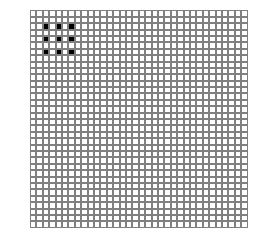

In [120]:
vermat (base())

### VARIABLES DEL SISTEMA

Los patrones que serviran de prueba para esta simulacion seran las 5 primero letras de mi nombre es decir CARLO, se ha escogido estos patrones para experimentar la relacion que tienen dichas letras.

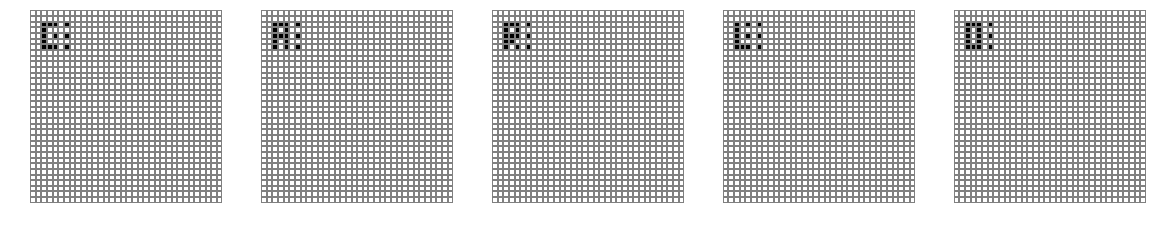

In [121]:
ver5 (m1,m2,m3,m4,m5)

### BUCLE ITERATIVO

RESULTADOS


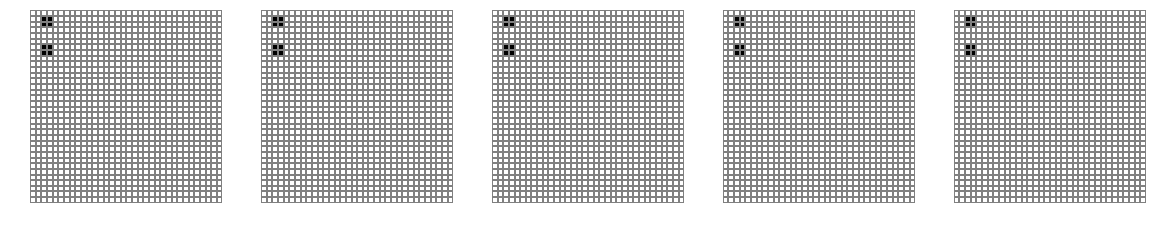

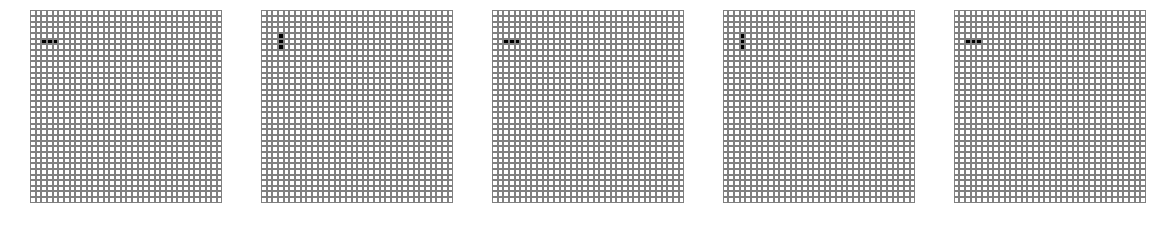

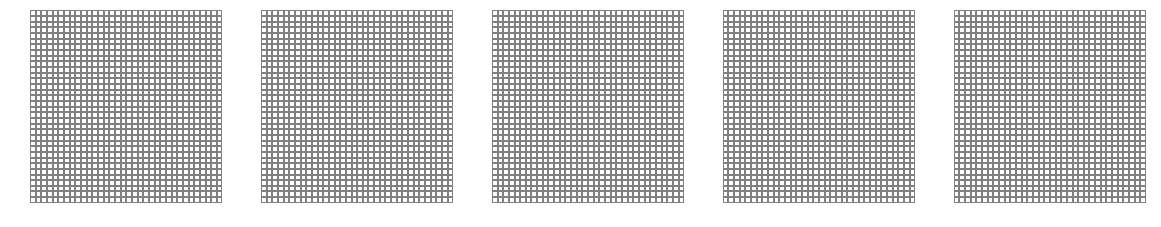

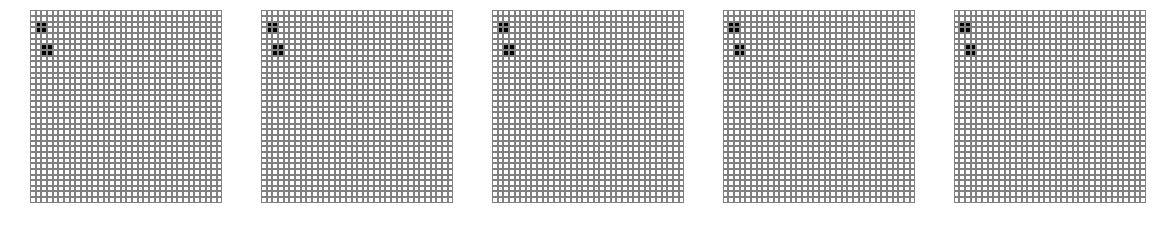

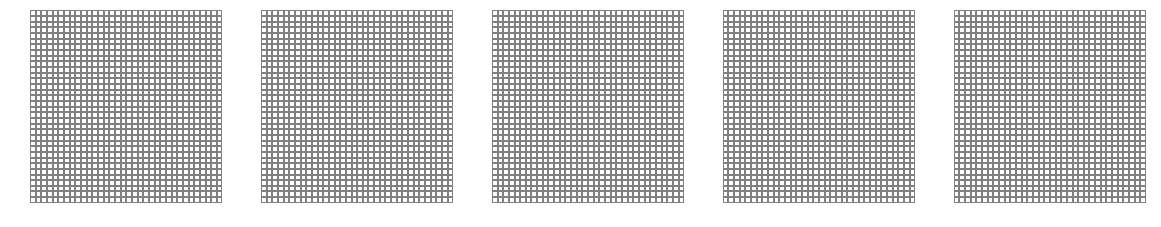

In [122]:
muestras = [m1,m2,m3,m4,m5] 
resultados = []
for m in muestras: 
    r = correr(300, m) 
    resultados.append(r)
    
print("RESULTADOS") 


i = 1 
for r in resultados: 
    ver5 (r[len(r)-5],r[len(r)-4],r[len(r)-3],r[len(r)-2],r[len(r)-1]) 
                                                                                                                                        
    i = i + 1

### RUIDO

Muestra  5


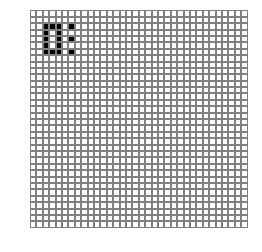

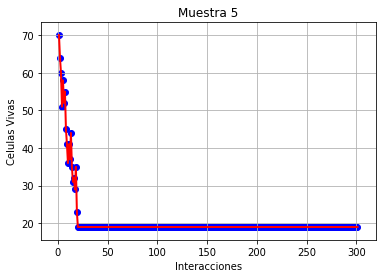

In [123]:
import simpy 
import random 
import matplotlib.pyplot as pp

dms={} 
dm={} 
j = 0 
for r in resultados: 
    j = j + 1 
    i = 0 
    for m in r: 
        i = i + 1 
        for fila in range(len(m)): 
            for columna in range(len(m)): 
                if m[fila][columna] == 1: 
                    if i in dm: 
                        dm[i]=dm[i]+1 
                    else: 
                        dm[i]=1
dms[j]=dm 
dm={}

# Generamos la grafica 
for key, dicm in dms.items(): 
    print ("Muestra ", key) 
    vermat (muestras[key-1]) 
    #print (dicm) 
    datos=sorted(dicm.items()) 
    x, y =zip(*datos) 
    pp.plot(x,y,linewidth=2,color='red') 
    pp.scatter(x,y,color='blue') 
    pp.grid(True) 
    pp.title("Muestra %s" %(key)) 
    pp.xlabel('Interacciones') 
    pp.ylabel('Celulas Vivas')
    pp.show()